In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib

In [3]:
matplotlib.rcParams["font.size"] = 16

In [4]:
# LINE PLOT EXAMPLES
# DataFrame.plot.line(...)     <--- many lines (one per column)
# Series.plot.line(...)        <--- one line

In [5]:
s = Series([0, 100, 300, 200, 400])
s

0      0
1    100
2    300
3    200
4    400
dtype: int64

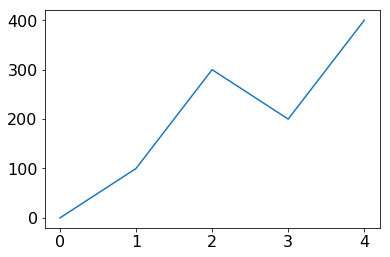

In [6]:
s.plot.line()

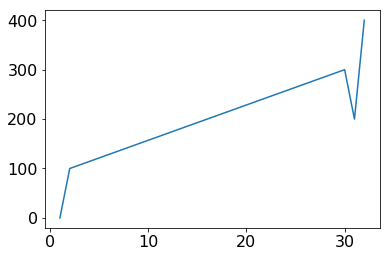

In [7]:
s = Series([0, 100, 300, 200, 400], index=[1, 2, 30, 31, 32])
s.plot.line()

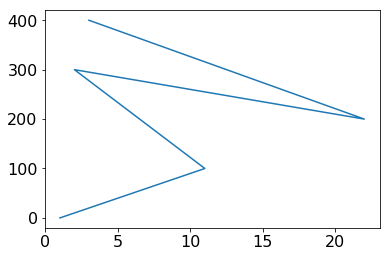

In [8]:
s = Series([0, 100, 300, 200, 400], index=[1, 11, 2, 22, 3])
s.plot.line()

In [9]:
s

1       0
11    100
2     300
22    200
3     400
dtype: int64

In [10]:
# L.sort() <-- modifies the list L, but returns None
#
# BOTH of these create new Series, they DO NOT modify the original
# Series.sort_values()
# Series.sort_index()
s.sort_index()

1       0
2     300
3     400
11    100
22    200
dtype: int64

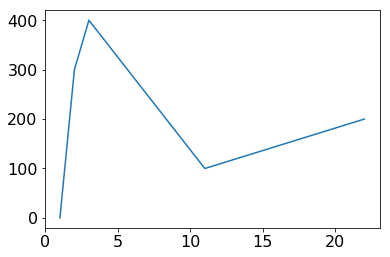

In [11]:
s = s.sort_index()
s.plot.line()

In [12]:
# EXAMPLE 2: DataFrame as line

In [13]:
df = DataFrame({
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})
df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


Text(0, 0.5, 'Temp (Fehrenheit)')

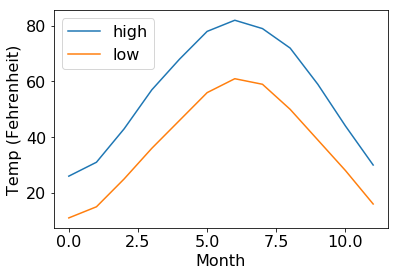

In [14]:
ax = df.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")

In [15]:
celcius = (df - 32) * (5/9)
celcius

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778
5,25.555556,13.333333
6,27.777778,16.111111
7,26.111111,15.000000
8,22.222222,10.000000
9,15.000000,3.888889


Text(0, 0.5, 'Temp (Celcius)')

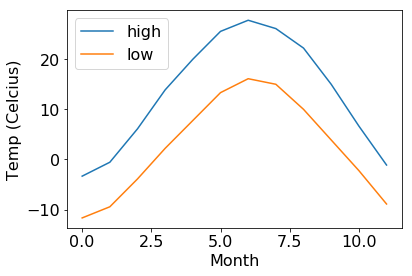

In [16]:
ax = celcius.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Celcius)")

In [17]:
df = DataFrame({
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})
df = df.set_index("month")
df

,high,low
month,,
Jan,26,11
Feb,31,15
Mar,43,25
Apr,57,36
May,68,46
Jun,78,56
Jul,82,61
Aug,79,59
Sep,72,50


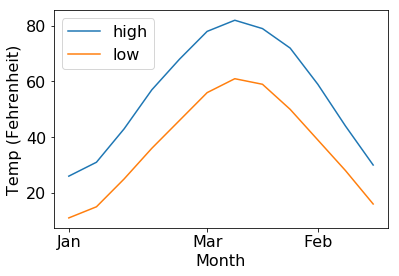

In [18]:
ax = df.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr"])
ax.set_xticks([0, 9, 5])

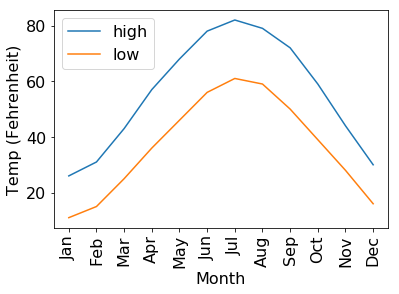

In [19]:
# TODO: better colors/styles
ax = df.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(df.index, rotation=90)
ax.set_xticks(range(12))
None

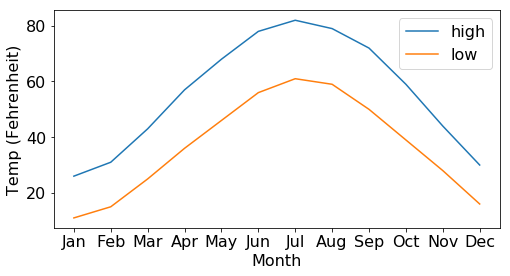

In [20]:
ax = df.plot.line(figsize=(8, 4))
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(df.index)
ax.set_xticks(range(12))
None

In [21]:
# EXAMPLE 3: analyze stock market returns

In [22]:
sp500 = pd.read_csv("sp500.csv")
sp500 = sp500.set_index("year")
sp500.tail()

,return
year,
2014,1.1369
2015,1.0138
2016,1.1196
2017,1.2183
2018,0.9557


In [23]:
sp500["tot-ret"] = sp500["return"].cumprod()
sp500.head()

,return,tot-ret
year,,
1970,1.0401,1.040100
1971,1.1431,1.188938
1972,1.1898,1.414599
1973,0.8534,1.207219
1974,0.7353,0.887668


In [24]:
sp500.tail()

,return,tot-ret
year,,
2014,1.1369,88.439335
2015,1.0138,89.659797
2016,1.1196,100.383109
2017,1.2183,122.296742
2018,0.9557,116.878996


Text(0, 0.5, 'Net Worth($)')

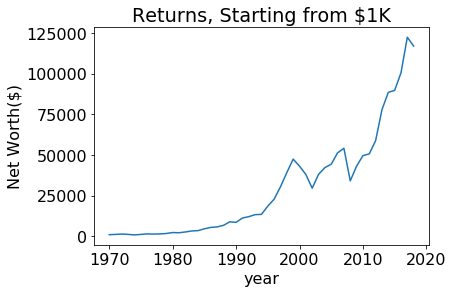

In [25]:
ax = (sp500["tot-ret"] * 1000).plot.line(title="Returns, Starting from $1K")
ax.set_ylabel("Net Worth($)")


In [26]:
import random

In [27]:
def run_sim(years=10):
    returns = random.choices(list(sp500["return"]), k=years)
    return Series(returns).cumprod()

In [28]:
sim_count = 50
df = DataFrame()
for i in range(sim_count):
    df["sim"+str(i)] = run_sim()
df

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim40,sim41,sim42,sim43,sim44,sim45,sim46,sim47,sim48,sim49
0,1.049100,1.062700,0.909000,1.215500,1.136900,1.186700,1.049100,1.076200,0.853400,1.186700,...,0.630000,1.304700,1.108800,1.013200,0.853400,1.013800,1.160000,1.062700,1.229600,0.955700
1,0.895302,1.178322,1.039078,1.161653,1.352684,1.454420,1.192722,1.274651,0.970230,1.328629,...,0.780192,1.728727,1.193291,1.342490,1.174108,0.893259,1.022076,1.178322,1.363380,1.015622
2,1.038550,1.038219,1.286794,1.515609,1.710604,1.545612,1.580356,0.937251,1.044162,1.415787,...,1.040464,1.523182,1.251881,0.987133,1.361965,1.034305,1.252656,1.426241,1.795436,1.305887
3,1.117688,1.335981,1.705002,1.535615,1.626442,2.046235,1.667118,0.949623,0.920011,1.724854,...,0.810521,1.752573,1.278296,1.358097,1.319744,1.113119,0.921078,1.570006,1.932248,1.374446
4,1.361679,1.768705,2.192292,1.652629,1.715734,2.633095,1.515410,1.163858,1.182950,1.519769,...,0.926507,2.016510,1.215404,1.747600,1.815704,1.128480,0.811562,1.740822,1.702504,1.070694
5,1.263910,1.903480,2.221230,1.533970,1.809927,3.187099,1.293251,1.532684,1.260552,1.803509,...,1.072803,2.305073,1.667534,1.491402,2.089149,1.242231,0.511284,2.292489,1.452917,1.268130
6,1.325968,1.399629,1.399375,2.032511,2.225487,4.030405,1.664155,1.970725,1.622078,2.474415,...,1.226321,2.335500,1.050546,1.551207,2.299735,1.129188,0.588283,3.035026,1.868160,1.395957
7,1.131581,1.715385,1.720671,2.693077,2.371479,4.910243,1.590433,1.535195,1.745681,2.865125,...,1.165986,2.384779,0.954947,1.889835,2.026297,1.188470,0.668819,2.758839,2.071416,1.469245
8,1.147197,2.076302,2.294687,1.696638,2.765381,5.218115,1.654210,1.766395,1.984664,2.902945,...,1.129840,3.015792,1.245919,1.914781,2.462963,1.204158,0.880768,3.785127,2.173123,1.679494
9,1.096376,2.470384,3.022792,1.939427,3.143962,6.053013,1.457524,2.045309,2.440343,3.300358,...,1.384732,3.934703,1.295880,1.634074,2.353854,1.656680,1.021691,4.355167,2.017092,1.944686


Text(0, 0.5, 'Net Worth ($)')

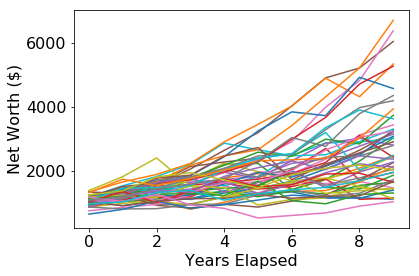

In [29]:
ax = (df * 1000).plot.line(legend=False)
ax.set_xlabel("Years Elapsed")
ax.set_ylabel("Net Worth ($)")

In [30]:
# 1. describe is over columns
# 2. want stats over each year
df.T.describe()[9]

count    50.000000
mean      2.800911
std       1.399164
min       1.021691
25%       1.749155
50%       2.455364
75%       3.291386
max       6.719353
Name: 9, dtype: float64

In [31]:
# EXAMPLE: bar plots with hydrants

In [32]:
hydrants = pd.read_csv("Fire_Hydrants.csv")
hydrants.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [33]:
hydrants["nozzle_color"].head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: nozzle_color, dtype: object

In [34]:
# bar plots:
# 1. Series.plot.bar(...)
# 2. DataFrame.plot.bar(...)
#
# WANT: a Series, with color for index, number of hydrants for values

In [35]:
hydrants.set_index("nozzle_color").head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,HydrantType,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,MaintainedBy,InstallType
nozzle_color,,,,,,,,,,,,,,,,,,,,,
blue,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,NaN,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,MADISON WATER UTILITY,NaN
blue,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,NaN,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,MADISON WATER UTILITY,NaN
blue,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,NaN,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,MADISON WATER UTILITY,NaN
blue,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,NaN,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,MADISON WATER UTILITY,NaN
blue,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,NaN,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,MADISON WATER UTILITY,NaN


In [36]:
colors = hydrants["nozzle_color"].value_counts()
colors

blue      5810
Blue      1148
Green      320
Orange      74
BLUE        45
Red          9
green        9
orange       4
white        1
ORANGE       1
GREEN        1
C            1
Name: nozzle_color, dtype: int64

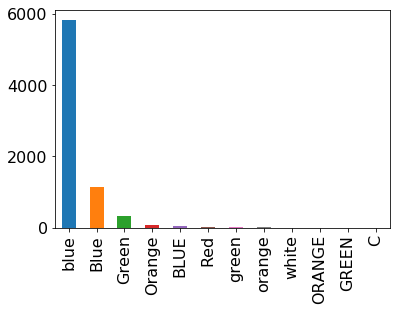

In [37]:
colors.plot.bar()

Text(0, 0.5, '# of Hydrants in Madison')

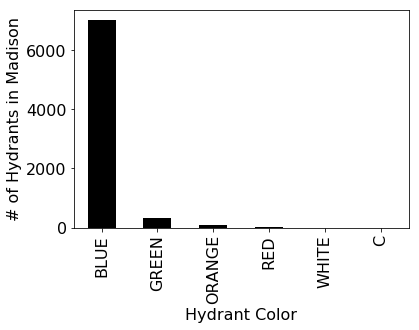

In [38]:
colors = hydrants["nozzle_color"].str.upper().value_counts()
# "blue".upper()  <-- a single string
ax = colors.plot.bar(color="black")
ax.set_xlabel("Hydrant Color")
ax.set_ylabel("# of Hydrants in Madison")

In [39]:
hydrants.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


Text(0, 0.5, '# of Hydrants in Madison')

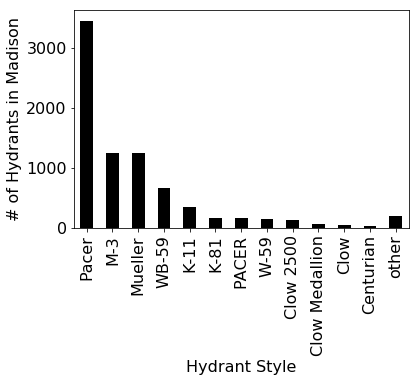

In [40]:
styles = hydrants["Style"].value_counts()
top12 = styles[:12]
top12["other"] = styles[12:].sum()
ax = top12.plot.bar(color="black")
ax.set_xlabel("Hydrant Style")
ax.set_ylabel("# of Hydrants in Madison")

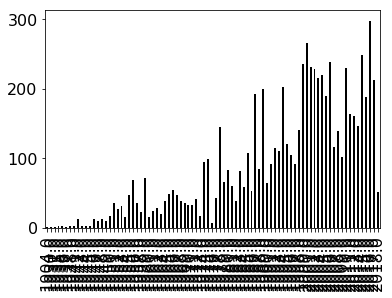

In [41]:
years = hydrants["year_manufactured"].value_counts()
years = years.sort_index()
ax = years.plot.bar(color="black")
#ax.set_xlabel("Year")
#ax.set_ylabel("# of Hydrants in Madison")

In [42]:
# remove NA years, so we have clean data for the rest of the example
hydrants = hydrants[~hydrants["year_manufactured"].isna()]

In [43]:
decades = hydrants["year_manufactured"] // 10 * 10
hydrants["decade"] = decades.astype(int)
hydrants.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType,decade
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990


Text(0, 0.5, '# of Hydrants in Madison')

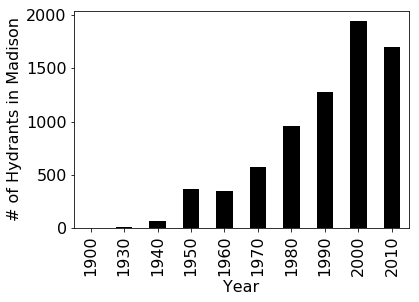

In [44]:
# TODO: don't skip decades, even if there's no data
decade = hydrants["decade"].value_counts()
ax = decade.sort_index().plot.bar(color="black")
ax.set_xlabel("Year")
ax.set_ylabel("# of Hydrants in Madison")

In [45]:
pacers = hydrants[hydrants["Style"].str.upper() == "PACER"]
others = hydrants[hydrants["Style"].str.upper() != "PACER"]
others.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType,decade
18,-89.523908,43.072698,2554,NaN,NaN,WUJAG,2018-10-03T18:36:56.000Z,HYDR-2250-1,NaN,NaN,...,MUELLER,Mueller,1987.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1980
22,-89.523818,43.061769,2558,NaN,NaN,WUJAG,2018-08-20T19:27:16.000Z,HYDR-2255-5,FASB,NaN,...,MUELLER,Mueller,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990
23,-89.524858,43.061533,2559,NaN,NaN,WUJAG,2018-08-20T19:27:16.000Z,HYDR-2255-4,FASB,NaN,...,MUELLER,Mueller,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1990
71,-89.518210,43.045511,2609,NaN,NaN,WUJAG,2018-05-23T19:04:12.000Z,HYDR-2362-2,NaN,NaN,...,MUELLER,Mueller,1987.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1980
72,-89.518387,43.045793,2610,NaN,NaN,WUJAG,2018-06-07T19:45:54.000Z,HYDR-2362-3,FASB,NaN,...,MUELLER,Mueller,1987.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN,1980


In [46]:
pacers["decade"].value_counts()

2000    1758
1990     849
2010     626
1980      21
1960       1
1950       1
Name: decade, dtype: int64

In [47]:
others["decade"].value_counts()

2010    1073
1980     937
1970     578
1990     428
1950     370
1960     349
2000     187
1940      68
1930       9
1900       1
Name: decade, dtype: int64

In [48]:
df = DataFrame({
   "pacers": pacers["decade"].value_counts(),
   "others": others["decade"].value_counts(),
})
df = df.sort_index()
df

,pacers,others
1900,NaN,1
1930,NaN,9
1940,NaN,68
1950,1.0,370
1960,1.0,349
1970,NaN,578
1980,21.0,937
1990,849.0,428
2000,1758.0,187
2010,626.0,1073


Text(0, 0.5, '# of Hydrants in Madison')

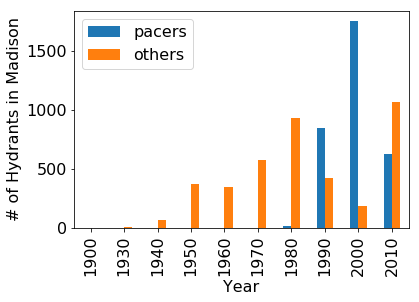

In [49]:
ax = df.plot.bar()
ax.set_xlabel("Year")
ax.set_ylabel("# of Hydrants in Madison")

Text(0, 0.5, '# of Hydrants in Madison')

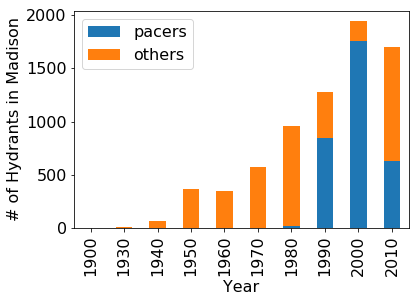

In [50]:
ax = df.plot.bar(stacked=True)
ax.set_xlabel("Year")
ax.set_ylabel("# of Hydrants in Madison")